In [1]:
import cv2 as cv
from Citra import Citra
from keras.models import model_from_json

model_json = open('model.json', 'r')
loaded = model_from_json(model_json.read())
model_json.close()
loaded.load_weights('model.h5')
loaded.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

Using TensorFlow backend.


In [ ]:
cap = cv.VideoCapture('data/video.3gp')

while(True):
    ret, frame = cap.read()
    
    if ret == False:
        cap.set(2, 0)
        continue

    citra = Citra(frame)
    citra.setLoadedModel(loaded)
    citra.resize((750, 500))
    citra.toGray()
    citra.toBinaryInv(127, 255)
    hasil = citra.getContour(1200, 15000)
    cv.imshow('frame', hasil['label'])
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

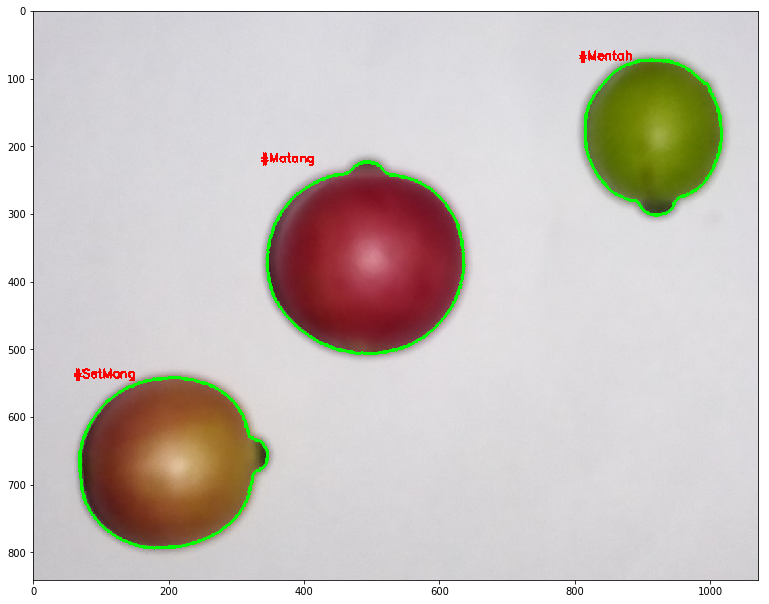

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))

citra = Citra(cv.imread('data/IMG_20181124_202049.jpg'))
citra.setLoadedModel(loaded)
# citra.resize((750, 500))
citra.toGray()
citra.toBinaryInv(127, 255)
hasil = citra.getContour(30000, 500000)
plt.imshow(cv.cvtColor(hasil['label'], cv.COLOR_BGR2RGB))
plt.show()